In [1]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
plt.rcParams["font.family"] = 'BM YEONSUNG'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.unicode_minus"] = False

In [2]:
Data=pd.read_excel("https://data.hossam.kr/E02/insur.xlsx")

In [3]:
Data.head(2)

,직업,교육수준,성별,나이,가입금액,월수입
0,1,2,1,35,15.0,100
1,2,3,1,40,10.0,150


## 신뢰구간 구하기
요소|설명
---|---
신뢰수준(clevel)|선택=(0.95)
샘플사이즈(n)|표본의 크기(n) 
자유도(degree for freedom)|n-1 
표본평균|
표본 표준푠차|자유도가 고려되어야함
표본 표준오차|표본 std/n**(0.5)

In [6]:
clevel=0.95
n=len(Data["가입금액"])
m=Data["가입금액"].mean()
std=Data["가입금액"].std(ddof=1) #자유도가 n-1이라는 뜻
sample_std=std/(n**0.5)

In [8]:
cmin,cmax=sp.stats.t.interval(clevel,n-1,m,sample_std)

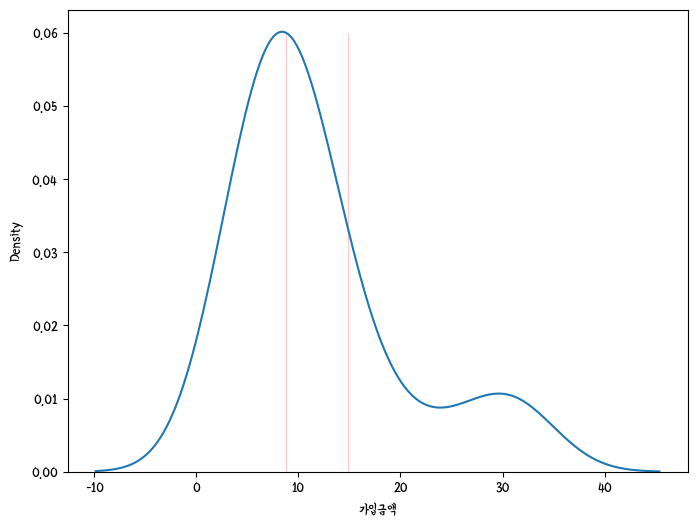

In [16]:
plt.figure()
sb.kdeplot(data=Data,x="가입금액")
sb.lineplot(x=[cmin,cmin],y=[0,0.06],color="Red")
sb.lineplot(x=[cmax,cmax],y=[0,0.06],color="Red")
plt.show()